<a href="https://colab.research.google.com/github/HanSong19/PALS0039-Introduction-to-Deep-Learning-for-Speech-and-Language-Processing-/blob/main/PALS0039_Ex_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![PALS0039 Logo](https://www.phon.ucl.ac.uk/courses/pals0039/images/pals0039logo.png)](https://www.phon.ucl.ac.uk/courses/pals0039/)

# Exercise 1.1 Python practice

## Statistics, functions and methods

Recall the following code from a previous exercise:

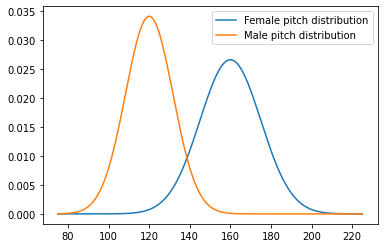

In [67]:
# Use python modules:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

f_pitch_mean = 160.0
f_pitch_sdev = 15.0
m_pitch_mean = 120.0
m_pitch_sdev = 11.7

# Plot distributions
x_values = np.arange(start=75.0,
                     stop=225.0,
                     step=0.001)
f_pitch_distribution = ss.norm(f_pitch_mean,
                                f_pitch_sdev)
m_pitch_distribution = ss.norm(m_pitch_mean,
                                m_pitch_sdev)

plt.plot(x_values,
         f_pitch_distribution.pdf(x_values),
         label="Female pitch distribution")
plt.plot(x_values,
         m_pitch_distribution.pdf(x_values),
         label="Male pitch distribution")
plt.legend()



The two normal distributions describe the typical pitch values found in the speech of female and male speakers and are represented by the *Python objects* **`f_pitch_distribution`** and **`m_pitch_distribution`**. These objects have *methods* that may be used to query the distributions, for example, the *probability density function* (`pdf` method) is used in the above plots (see [this reference](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) for more information).

(a) Using these distributions, write a Python function that would *classify* a pitch value from a new utterance as being spoken by either a female or male speaker **based on which is most likely**.

(b) Apply the function to the two sets of measurements taken for male and female speakers (defined in `pitch_male_utterances` and `pitch_female_utterances`) and print out the results.

(c) Does the classifier perform perfectly on the test measurements? Why?

In [68]:
f_pitch_measurements = [173.035,
                        151.889,
                        172.420,
                        177.477,
                        201.272,
                        147.098,
                        149.223,
                        150.374,
                        134.374,
                        171.970]
m_pitch_measurements = [150.637,
                        137.966,
                        140.504,
                         96.626,
                        131.268,
                        124.797,
                        142.892,
                        123.493,
                        117.713,
                        130.044]
 
#(a)
def classify_utterance_speaker(pitch_value):
  if f_pitch_distribution.pdf(pitch_value) < m_pitch_distribution.pdf(pitch_value):
    return 'female'
  else:
    return 'male'



#(b)
print("--------------------------------------")
print("RESULTS FOR FEMALE PITCH MEASUREMENTS:")
for i in f_pitch_measurements:
  print(i, classify_utterance_speaker(i), sep="\t")
print("--------------------------------------")
print("RESULTS FOR MALE PITCH MEASUREMENTS:")
for i in m_pitch_measurements:
  print(i, classify_utterance_speaker(i), sep='\t')
print("--------------------------------------")

#(c)
#ANSWER

--------------------------------------
RESULTS FOR FEMALE PITCH MEASUREMENTS:
173.035	male
151.889	male
172.42	male
177.477	male
201.272	male
147.098	male
149.223	male
150.374	male
134.374	female
171.97	male
--------------------------------------
RESULTS FOR MALE PITCH MEASUREMENTS:
150.637	male
137.966	female
140.504	male
96.626	female
131.268	female
124.797	female
142.892	male
123.493	female
117.713	female
130.044	female
--------------------------------------


## Text manipulation

Given the text string assigned to the Python variable `two_cities`, do the following:

(d) Write a function or code to split the text into a list of words, removing all punctuation in the process.

Hint: Python's [`string`](https://docs.python.org/3/library/string.html) module contains useful methods and definitions.

(e) Count the total number of words and unique words used.

(f) Count the number of occurrences of each word and print the results in descending order by frequency of occurrence.

Hints:
- You could use a Python dictionary to keep track of the word counts.
- You may find useful tools in Python's [`collections`](https://docs.python.org/3/library/collections.html) module.
- Python's [sorting documentation](https://docs.python.org/3/howto/sorting.html)

(g) Would your code work regardless of the input language? Why? How would you write a language-independent version?

In [54]:
# Use python modules:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import string
import collections
import operator
from collections import Counter

#From: https://www.gutenberg.org/files/98/98-h/98-h.htm
two_cities = """
It was the best of times, it was the worst of times,
it was the age of wisdom, it was the age of foolishness,
it was the epoch of belief, it was the epoch of incredulity,
it was the season of Light, it was the season of Darkness,
it was the spring of hope, it was the winter of despair,
we had everything before us, we had nothing before us,
we were all going direct to Heaven, we were all going direct the other way,
in short, the period was so far like the present period,
that some of its noisiest authorities insisted on its being received,
for good or for evil, in the superlative degree of comparison only.
"""

#(d)
def tokenize(text):
  for p in string.punctuation:
    text= text.replace(p," ")
  return text.lower().split()


#(e)
print("the total number of words:", len(tokenize(two_cities)))

print("the numbe of unique words:", len(set(tokenize(two_cities))))

#(f)
#https://docs.python.org/3/library/operator.html <<--- see operator.itemgetter
word_counter=Counter(tokenize(two_cities))
word_frequency=list(word_counter.items())
print(word_frequency)

word_frequency.sort(key=operator.itemgetter(1), reverse=True)
for w, f in word_frequency:
  print(w,f, sep='\t')

the total number of words: 119
the numbe of unique words: 58
[('it', 10), ('was', 11), ('the', 14), ('best', 1), ('of', 12), ('times', 2), ('worst', 1), ('age', 2), ('wisdom', 1), ('foolishness', 1), ('epoch', 2), ('belief', 1), ('incredulity', 1), ('season', 2), ('light', 1), ('darkness', 1), ('spring', 1), ('hope', 1), ('winter', 1), ('despair', 1), ('we', 4), ('had', 2), ('everything', 1), ('before', 2), ('us', 2), ('nothing', 1), ('were', 2), ('all', 2), ('going', 2), ('direct', 2), ('to', 1), ('heaven', 1), ('other', 1), ('way', 1), ('in', 2), ('short', 1), ('period', 2), ('so', 1), ('far', 1), ('like', 1), ('present', 1), ('that', 1), ('some', 1), ('its', 2), ('noisiest', 1), ('authorities', 1), ('insisted', 1), ('on', 1), ('being', 1), ('received', 1), ('for', 2), ('good', 1), ('or', 1), ('evil', 1), ('superlative', 1), ('degree', 1), ('comparison', 1), ('only', 1)]
the	14
of	12
was	11
it	10
we	4
times	2
age	2
epoch	2
season	2
had	2
before	2
us	2
were	2
all	2
going	2
direct	2
in